# Introduction to PyTorch

This tutorial shows the basics of PyTorch library.

We design simple Neural Networks for classification task on MNIST dataset.

Necessary knowledge you can find in PyTorch documentation:

https://pytorch.org/docs/stable/index.html

and tutorials:

https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html

Of course you can use also Google ;)

https://github.com/MichalMachura/AGH-EmbeddedAI

In [1]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


1. PyTorch is based on tensor operations.

Please create tensors in the following ways:
(for all cases use `shape = (1, 3, 28, 28)` - (batch_size, channels, height, width).)

a) directly with python list (with any shape) - 

b) based on numpy array with `shape` - `torch.from_numpy`

c) with random values (initialize generator with your academic id / student number from USOS system) -

`torch.manual_seed`,`torch.rand`

d) linear space in range from -5 to 15 and number of elements to achieve `shape` - `torch.linspace`

e) 3 tensors (`x1,x2,x2`) with indices of each element of grid for dimensions: 1, 2, 3 (without 0-th - basically it's a batch dimension) - `torch.meshgrid`

For display use `print` function.

In [2]:
import torch
import numpy as np

# shape = (1,3,28,28)
# shape changed for better visualization
shape = (1,2,4,7)

# a
print("Tensor crated with python list:")
t = torch.tensor([3243.4, 44.2, 4242.4], dtype=torch.float32)
print(t)
# b
print("Tensor crated from numpy array:")
a = np.random.rand(*shape)
t = torch.from_numpy(a)
print(t)
# c
print("Tensor crated with random values initialized with manual seed:")
torch.manual_seed(43543)
t = torch.rand(shape)
print(t)
# d
print("Tensor crated with linear space between -5 and 15 for num of elem. designated for shape:")
t = torch.linspace(-5,15, shape[0]*shape[1]*shape[2]*shape[3]).reshape(shape)
print(t)
# e
print("Tensors crated as mesh grid - indices of elements:")
x0 = torch.arange(shape[0])
x1 = torch.arange(shape[1])
x2 = torch.arange(shape[2])
x3 = torch.arange(shape[3])
x0, x1, x2, x3 = torch.meshgrid(x0,x1,x2,x3,indexing='ij')
print("Index for dim = 0:")
print(x0)
print("Index for dim = 1:")
print(x1)
print("Index for dim = 2:")
print(x2)
print("Index for dim = 3:")
print(x3)

# f - create tensor of zeros
print("Tensors crated with torch.zeros:")
t = torch.zeros(shape,  #  size / shape of tensor  
                dtype=torch.float32,  # data type
                device=torch.device('cpu'),  #  device where tensor will be stored 
                pin_memory=True, # True allocates tensor in pinned memory (in memory pages stored in RAM, 
                                 # not in hard disc). That allows for efficient data transfer from global RAM to GPU RAM 
                )
print(t)
print("is pinned =",t.is_pinned())
print("device =",t.device)
# g - create tensor the same like other tensor
print("Tensors crated with torch.zeros_like:")
t = torch.zeros_like(t,
                    #  pin_memory=True, # by default copy is stored in non pinned memory
                     )
print(t)
print("is pinned =",t.is_pinned())
print("device =",t.device)

# there are function similar to `zeros
# torch.ones, torch.ones_like, - fill with ones
# torch.empty, torch.empty_like - non initialized tensors - with 'garbages'

# h  transfer tensor to device
print("Tensors transferred to cuda device:")
t = t.to(device=torch.device('cuda'))
print(t)
print("is pinned =",t.is_pinned()) # for cuda it gives false, because pinned can be only general/global RAM memory

Tensor crated with python list:
tensor([3243.3999,   44.2000, 4242.3999])
Tensor crated from numpy array:
tensor([[[[6.1994e-02, 5.2266e-01, 5.1964e-02, 9.0722e-01, 9.9189e-01,
           7.4174e-01, 4.7657e-01],
          [8.5300e-01, 2.7969e-01, 9.8429e-01, 8.5806e-01, 9.0857e-01,
           3.0117e-01, 9.0791e-01],
          [2.9248e-01, 9.1552e-01, 7.3535e-01, 9.7008e-01, 3.1005e-01,
           8.8035e-01, 1.6735e-01],
          [5.3547e-01, 3.0460e-02, 1.8167e-01, 1.1739e-01, 5.3739e-01,
           3.7609e-01, 4.6034e-03]],

         [[5.6198e-01, 4.6703e-02, 9.8283e-01, 5.8463e-01, 5.6803e-01,
           4.8234e-01, 4.2781e-01],
          [3.7592e-01, 8.4424e-01, 1.3184e-01, 3.5817e-01, 1.6569e-01,
           2.5399e-01, 4.4909e-01],
          [1.4242e-01, 3.7306e-01, 4.2029e-01, 3.6517e-01, 2.9192e-02,
           1.7943e-01, 4.7154e-01],
          [7.8978e-01, 9.5465e-01, 3.2802e-04, 9.0928e-01, 2.1660e-01,
           2.8856e-02, 6.6137e-01]]]], dtype=torch.float64)
Tensor crate

2. PyTorch allow for applying GPU for computations.
Check if gpu (CUDA) is available, then use it as `device`, else use `'cpu'`.

In [3]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)
t = torch.tensor([43,43], device=device)
print(t)

cuda
tensor([43, 43], device='cuda:0')


3. To train a networks we need a dataset. 

Please download `MINIST` dataset with `torchvision.dataset`.

For any kind of ML tasks, validation and/or testing is required.

So, create train and test datasets.

For train dataset apply also augmentation transforms, crop, translation and rotation.

You can try to apply different transforms.

For both apply ToTensor.

Next, pack datasets into `DataLoader`s with batch size of 64.
Use variables with names: `train_loader` and `test_loader`. 

Next display sizes of datasets, shapes of elements and display few images (`plt.gray()`,`plt.imshow()`) and their labels.

len(train_loader) = 938
len(test_loader) = 157
torch.Size([64, 1, 28, 28])
torch.Size([64])


<Figure size 432x288 with 0 Axes>

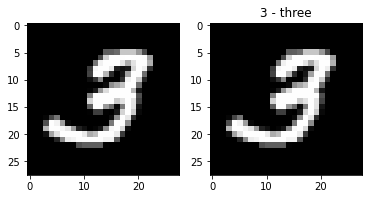

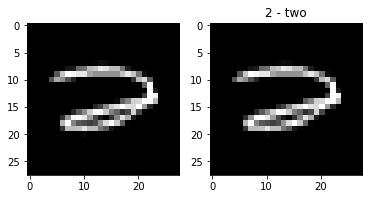

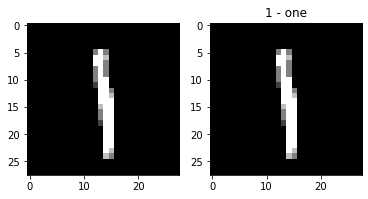

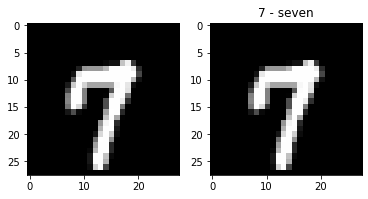

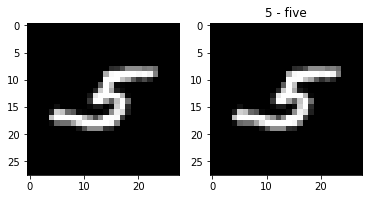

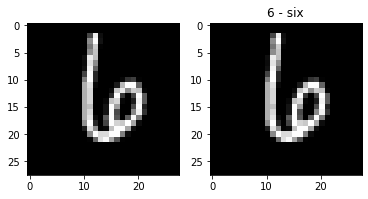

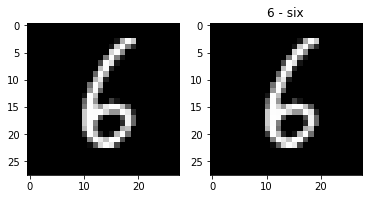

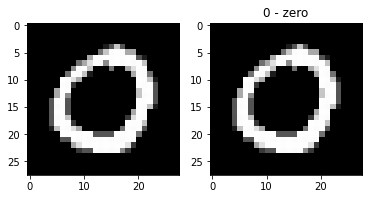

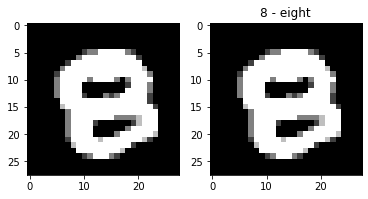

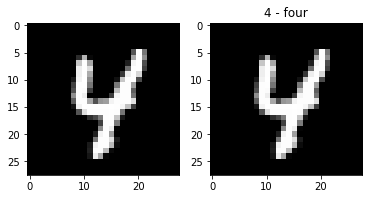

In [4]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, RandomRotation
import matplotlib.pyplot as plt

train_dataset = datasets.MNIST('data', 
                              train=True,
                              download=True,
                              transform=ToTensor())
test_dataset = datasets.MNIST('data', 
                              train=False,
                              download=True,
                              transform=ToTensor())

train_loader = DataLoader(train_dataset, 
                          batch_size=64,
                          shuffle=True)
test_loader = DataLoader(test_dataset, 
                          batch_size=64,
                          shuffle=False)

print("len(train_loader) =", len(train_loader))
print("len(test_loader) =", len(test_loader))

plt.gray()
for X, y in train_loader:
    print(X.shape)
    print(y.shape)
    
    for i, img in enumerate(X[:10,...]):
        class_label = train_loader.dataset.classes[y[i]]
        
        fig, (ax1, ax2) = plt.subplots(1, 2)
        
        # display single channel array as 2d map
        plt.title(class_label)
        ax1.imshow(img[0,...])
        
        # 3d map convert to channel last convention
        img = img.permute(1,2,0) # <- change dimensions' order
        ax2.imshow(img)
            
    break
        

4. `*`Additionally, you can prepare analysis of datasets. 

E.g. statistics like running mean and variance of all elements, for each label.

Analysis can allow you for designing better network architecture.   

5. When we have datasets, we can create model for classification task.

Please, define class `MLP` as Multi Layer Perceptron 

with two hidden fully connected layers with bias.

Class must inherits from `torch.nn.Module`.

Apply following configuration:

- first with 512 neurons,
- second with 512 neurons,
- output layer adjust to tho size of classification problem.

For `__init__` method add parameters: input_shape and output_size.

Hidden layers sizes can also be parametrized. 

Don't forget about nonlinearities! 

For hidden layers you can use `ReLU` module from `torch.nn`.

For output apply softmax function / layers.

Network layer-by-layer processing define in `forward` method with argument as a network 

input tensor - batch of images with shape (batch_size, channels, height, width).
(channels = 1, for gray scale images)

Instantiate model as `net` object.


Layers:
- `torch.nn.Sequential`
    - layer allows for forward pass through
        component layers:
        ```
        t_in: Tensor
        t_out: Tensor = t_in
        for L in layers:
            t_out = L(t_out)
        return t_out```
        
- `torch.nn.Flatten`
    - layer makes input tensor flattened:
    - (bs,CH,H,W) - > (bs,CH*H*W)
    
- `torch.nn.Linear(ch_in, ch_out, bias)`
    - 'classical' neural network layer - fully connected
    - ch_in is a number of input channels
    - ch_out is number of output channels / number of neurons in layer
    - bias - whether to use bias parameter
    - for Linear layers it is recommended to use flatten layer before, 
            when input has more than 2 dimensions
    - operation implemented by this layer is a vector / matrix multiplication
        - `y = W x v` or `y = W x v + b`
        - W has a shape [ch_out, ch_in]
        - v has a shape [ch_in]
        - b has a shape [ch_in]
        - y has a shape [ch_out]

- `torch.nn.ReLU`
    - layer applies ReLU function on input tensor
    
- `torch.nn.Softmax(dim)`
    - layer applies softmax function on input tensor
    - `dim` - dimension over which function is calculated


For the formulas of activation function go to [torch documentation](https://pytorch.org/docs/stable/index.html)

In [5]:
from typing import List, Tuple


class MLP(torch.nn.Module):

    def __init__(self, 
                 input_shape:Tuple[int,int,int], 
                 num_of_outputs:int
                 ) -> None:
        super().__init__()
        
        #  simple version
        self.net = torch.nn.Sequential(
                                      torch.nn.Flatten(),
                                      
                                      torch.nn.Linear(torch.prod(torch.tensor(input_shape)),
                                                      512,
                                                      ),
                                      torch.nn.ReLU(),
                                      
                                      torch.nn.Linear(512,
                                                      512,
                                                    #   bias=True
                                                      ),
                                      torch.nn.ReLU(),
                                      
                                      torch.nn.Linear(512,
                                                      num_of_outputs,
                                                    #   bias=True
                                                      ),
                                      torch.nn.Softmax(dim=1),
        )
        
        # more complex version - allows customizations
        # self.fc1 = torch.nn.Linear(torch.prod(torch.tensor(input_shape)), 512) 
        # self.fc2 = torch.nn.Linear(512, 512, bias=True) 
        # self.fc3 = torch.nn.Linear(512, num_of_outputs, bias=True)
         
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # simple version
        return self.net(x)
        
        # complex version
        # x = x.flatten(1) # for flattening use flatten method
        # x = self.fc1(x)
        # x = torch.relu(x) # function instead of module
        # x = self.fc2(x)
        # x = torch.relu(x) # function instead of module
        # x = self.fc3(x)
        # x = torch.softmax(x,dim=1)  # function instead of module
        # return x
        


net = MLP((1,28,28), # images shape
          10 # number of classes of images - digits 0-9
          )
# net = net.to(device)

6. To train network we need to know 'how good or bad' results it gives.
Please, instantiate `torch.nn.CrossEntropyLoss` as `loss_fcn`.

In [6]:
loss_fcn = torch.nn.CrossEntropyLoss(reduction='mean')  # criterion will calculate mean CE from batch

7. To score network define accuracy metric.

For network output you need to decide what is the final network answer(`argmax`).

`torch.no_grad()` prevents gradient requirement for computations inside method.

In [7]:
from abc import ABC, abstractmethod
from typing import Any


class BaseMetic(ABC):

    @abstractmethod
    def __call__(self, y_pred, y_ref) -> Any:
        raise NotImplementedError()    
    
    
class AccuracyMetic(BaseMetic):

    def __init__(self) -> None:
        pass
    
    @torch.no_grad()
    def __call__(self, y_pred: torch.Tensor, y_ref: torch.Tensor) -> torch.Tensor:
        """
        :param y_pred: tensor of shape (batch_size, num_of_classes) type float
        :param y_ref: tensor with shape (batch_size,) and type Long
        :return: scalar tensor with accuracy metric for batch
        """
        y_pred = y_pred.argmax(1)
        cmp = y_pred == y_ref
        # scalar value
        score: torch.Tensor = cmp.sum() / cmp.shape[0]
        
        return score


metric = AccuracyMetic()

8. To change network parameters, we need optimizers object.

Instantiate `torch.optim.SGD` (with `net`work `parameters`) as `optimizer`.

Use learning rate = 0.01.

Count number of parameters.

In [8]:
def count_params(model: torch.nn.Module):
    num_of_params = 0
    for p in model.parameters():
        num_of_params += p.view(-1,1).shape[0]
        
    return num_of_params


params = net.parameters()
optimizer = torch.optim.SGD(params, # tell optimizer what is the object of optimization  
                            lr=0.01  # how big steps opt. should take
                            )
print("Number of parameters:", count_params(net))

Number of parameters: 669706


9. Now define training / testing function:

Util functions: `tensor.backward`, `torch.nn.module()`

In [9]:
from typing import Tuple
import tqdm


def train_test_pass(model: torch.nn.Module, 
                    data_generator, 
                    criterion, 
                    metric: BaseMetic,
                    optimizer: torch.optim.Optimizer = None, 
                    update_period: int = None,
                    mode: str = 'test',
                    device = torch.device('cpu')) -> Tuple[torch.nn.Module, float, float]:
    
    # change model mode to train or test
    if mode == 'train':
        model.train(True)
        
    elif mode == 'test':
        model.eval()
        
    else:
        raise RuntimeError("Unsupported mode.")

    # move model to device
    model = model.to(device)
    
    # reset model parameters' gradients with optimizer
    if mode == 'train':
        optimizer.zero_grad()
    
    total_loss: float = 0.0
    total_accuracy: float = 0.0
    samples_num: int = 0
    
    for i, (X, y_ref) in tqdm.tqdm(enumerate(data_generator),):
        # convert tensors to device
        X = X.to(device)
        y_ref = y_ref.to(device)
        
        # process by network
        y_pred = model(X)
        
        # calculate loss
        loss: torch.Tensor = criterion(y_pred, y_ref)
        
        # designate gradient based on loss
        loss.backward()
        
        if mode == 'train' and (i+1) % update_period == 0:
            # update parameters with optimizer
            optimizer.step()
            # gradient designation sums it's values from previous passes 
            # there is needed zeroing stored values of gradient
            optimizer.zero_grad()
            
        # calculate accuracy
        accuracy = metric(y_pred, y_ref)
        
        total_loss += loss.item() * y_pred.shape[0]
        total_accuracy += accuracy.item() * y_pred.shape[0]
        samples_num += y_pred.shape[0]
    
    if samples_num == 0:
        return model, 0.0, 0.0
    
    return model, total_loss / samples_num, total_accuracy / samples_num

10. Prepare training loop (over epochs) function:
- adjust max number of epochs to achieve satisfactory results.
- `**` additionally, implement auto-detection of bias-variance tradeoff point, to break further training.
- `***` additionally, use learning rate scheduler.
- for each epoch collect losses and accuracies for both datasets.

In [10]:
def training(model,
             train_loader,
             loss_fcn,
             metric,
             optimizer,
             update_period,
             epoch_max,
             device):
    loss_train = []
    loss_test = []
    acc_train = []
    acc_test = []

    for e in range(epoch_max):
        epoch = e+1
        print(f'Epoch {epoch} / {epoch_max}: STARTED')
        print('TRAINING', end='')
        net, loss, acc = train_test_pass(model,
                                         train_loader,
                                         loss_fcn,
                                         metric,
                                         optimizer,
                                         update_period=update_period,
                                         mode='train',
                                         device=device)
        loss_train.append(loss)
        acc_train.append(acc)

        print('\rVALIDATION', end='')
        net, loss, acc = train_test_pass(model,
                                         test_loader,
                                         loss_fcn,
                                         metric,
                                         optimizer,
                                         update_period=update_period,
                                         mode='test',
                                         device=device)
        loss_test.append(loss)
        acc_test.append(acc)

        print(
            f'\rAfter epoch {epoch}: loss={loss_train[-1]:.4f} acc={acc_train[-1]:.4f} val_loss={loss_test[-1]:.4f} val_acc={acc_test[-1]:.4f}')
        print(f'Epoch {epoch} / {epoch_max}: FINISHED\n')
    
    return model, {'loss_train': loss_train, 
                   'acc_train': acc_train, 
                   'loss_test': loss_test, 
                   'acc_test': acc_test}

In [11]:
net, history = training(net,
                        train_loader,
                        loss_fcn,
                        metric,
                        optimizer,
                        update_period=5,
                        epoch_max=30,
                        device=device)

Epoch 1 / 30: STARTED
TRAINING

938it [00:07, 119.36it/s]


VALIDATION

157it [00:01, 113.45it/s]


After epoch 1: loss=2.3009 acc=0.2069 val_loss=2.2988 val_acc=0.3733
Epoch 1 / 30: FINISHED

Epoch 2 / 30: STARTED
TRAINING

938it [00:07, 118.59it/s]


VALIDATION

157it [00:01, 123.72it/s]


After epoch 2: loss=2.2958 acc=0.4244 val_loss=2.2917 val_acc=0.4139
Epoch 2 / 30: FINISHED

Epoch 3 / 30: STARTED
TRAINING

938it [00:07, 121.17it/s]


VALIDATION

157it [00:01, 121.52it/s]


After epoch 3: loss=2.2809 acc=0.2929 val_loss=2.2578 val_acc=0.2052
Epoch 3 / 30: FINISHED

Epoch 4 / 30: STARTED
TRAINING

938it [00:07, 120.59it/s]


VALIDATION

157it [00:01, 128.55it/s]


After epoch 4: loss=2.2183 acc=0.2722 val_loss=2.1651 val_acc=0.3547
Epoch 4 / 30: FINISHED

Epoch 5 / 30: STARTED
TRAINING

938it [00:06, 134.03it/s]


VALIDATION

157it [00:01, 128.19it/s]


After epoch 5: loss=2.0754 acc=0.4382 val_loss=1.9863 val_acc=0.5108
Epoch 5 / 30: FINISHED

Epoch 6 / 30: STARTED
TRAINING

938it [00:07, 124.15it/s]


VALIDATION

157it [00:01, 121.13it/s]


After epoch 6: loss=1.9202 acc=0.5987 val_loss=1.8583 val_acc=0.6553
Epoch 6 / 30: FINISHED

Epoch 7 / 30: STARTED
TRAINING

938it [00:07, 120.56it/s]


VALIDATION

157it [00:01, 125.55it/s]


After epoch 7: loss=1.8349 acc=0.6583 val_loss=1.8043 val_acc=0.6878
Epoch 7 / 30: FINISHED

Epoch 8 / 30: STARTED
TRAINING

938it [00:07, 123.62it/s]


VALIDATION

157it [00:01, 125.12it/s]


After epoch 8: loss=1.7670 acc=0.7577 val_loss=1.7228 val_acc=0.8036
Epoch 8 / 30: FINISHED

Epoch 9 / 30: STARTED
TRAINING

938it [00:07, 127.35it/s]


VALIDATION

157it [00:01, 134.98it/s]


After epoch 9: loss=1.7080 acc=0.8052 val_loss=1.6845 val_acc=0.8183
Epoch 9 / 30: FINISHED

Epoch 10 / 30: STARTED
TRAINING

938it [00:07, 119.62it/s]


VALIDATION

157it [00:01, 130.63it/s]


After epoch 10: loss=1.6808 acc=0.8152 val_loss=1.6654 val_acc=0.8259
Epoch 10 / 30: FINISHED

Epoch 11 / 30: STARTED
TRAINING

938it [00:07, 131.23it/s]


VALIDATION

157it [00:01, 130.34it/s]


After epoch 11: loss=1.6654 acc=0.8217 val_loss=1.6533 val_acc=0.8312
Epoch 11 / 30: FINISHED

Epoch 12 / 30: STARTED
TRAINING

938it [00:07, 127.13it/s]


VALIDATION

157it [00:01, 128.87it/s]


After epoch 12: loss=1.6555 acc=0.8265 val_loss=1.6455 val_acc=0.8348
Epoch 12 / 30: FINISHED

Epoch 13 / 30: STARTED
TRAINING

938it [00:07, 121.88it/s]


VALIDATION

157it [00:01, 127.26it/s]


After epoch 13: loss=1.6484 acc=0.8302 val_loss=1.6398 val_acc=0.8369
Epoch 13 / 30: FINISHED

Epoch 14 / 30: STARTED
TRAINING

938it [00:07, 129.27it/s]


VALIDATION

157it [00:01, 128.31it/s]


After epoch 14: loss=1.6431 acc=0.8328 val_loss=1.6352 val_acc=0.8398
Epoch 14 / 30: FINISHED

Epoch 15 / 30: STARTED
TRAINING

938it [00:07, 120.98it/s]


VALIDATION

157it [00:01, 121.47it/s]


After epoch 15: loss=1.6332 acc=0.8437 val_loss=1.6099 val_acc=0.8816
Epoch 15 / 30: FINISHED

Epoch 16 / 30: STARTED
TRAINING

938it [00:07, 118.50it/s]


VALIDATION

157it [00:01, 119.97it/s]


After epoch 16: loss=1.6048 acc=0.8839 val_loss=1.5929 val_acc=0.8899
Epoch 16 / 30: FINISHED

Epoch 17 / 30: STARTED
TRAINING

938it [00:07, 125.04it/s]


VALIDATION

157it [00:01, 120.34it/s]


After epoch 17: loss=1.5924 acc=0.8920 val_loss=1.5840 val_acc=0.8966
Epoch 17 / 30: FINISHED

Epoch 18 / 30: STARTED
TRAINING

938it [00:07, 119.91it/s]


VALIDATION

157it [00:01, 123.25it/s]


After epoch 18: loss=1.5846 acc=0.8966 val_loss=1.5772 val_acc=0.9004
Epoch 18 / 30: FINISHED

Epoch 19 / 30: STARTED
TRAINING

938it [00:07, 123.17it/s]


VALIDATION

157it [00:01, 119.49it/s]


After epoch 19: loss=1.5788 acc=0.8999 val_loss=1.5726 val_acc=0.9026
Epoch 19 / 30: FINISHED

Epoch 20 / 30: STARTED
TRAINING

938it [00:07, 120.46it/s]


VALIDATION

157it [00:01, 120.62it/s]


After epoch 20: loss=1.5742 acc=0.9031 val_loss=1.5688 val_acc=0.9067
Epoch 20 / 30: FINISHED

Epoch 21 / 30: STARTED
TRAINING

938it [00:07, 120.05it/s]


VALIDATION

157it [00:01, 119.64it/s]


After epoch 21: loss=1.5704 acc=0.9056 val_loss=1.5657 val_acc=0.9079
Epoch 21 / 30: FINISHED

Epoch 22 / 30: STARTED
TRAINING

938it [00:07, 119.00it/s]


VALIDATION

157it [00:01, 119.65it/s]


After epoch 22: loss=1.5671 acc=0.9080 val_loss=1.5628 val_acc=0.9107
Epoch 22 / 30: FINISHED

Epoch 23 / 30: STARTED
TRAINING

938it [00:07, 119.94it/s]


VALIDATION

157it [00:01, 120.31it/s]


After epoch 23: loss=1.5644 acc=0.9098 val_loss=1.5601 val_acc=0.9129
Epoch 23 / 30: FINISHED

Epoch 24 / 30: STARTED
TRAINING

938it [00:07, 119.96it/s]


VALIDATION

157it [00:01, 120.90it/s]


After epoch 24: loss=1.5618 acc=0.9119 val_loss=1.5581 val_acc=0.9135
Epoch 24 / 30: FINISHED

Epoch 25 / 30: STARTED
TRAINING

938it [00:07, 127.30it/s]


VALIDATION

157it [00:01, 132.00it/s]


After epoch 25: loss=1.5597 acc=0.9134 val_loss=1.5558 val_acc=0.9153
Epoch 25 / 30: FINISHED

Epoch 26 / 30: STARTED
TRAINING

938it [00:07, 125.27it/s]


VALIDATION

157it [00:01, 121.49it/s]


After epoch 26: loss=1.5577 acc=0.9153 val_loss=1.5540 val_acc=0.9175
Epoch 26 / 30: FINISHED

Epoch 27 / 30: STARTED
TRAINING

938it [00:07, 120.80it/s]


VALIDATION

157it [00:01, 122.12it/s]


After epoch 27: loss=1.5558 acc=0.9164 val_loss=1.5526 val_acc=0.9190
Epoch 27 / 30: FINISHED

Epoch 28 / 30: STARTED
TRAINING

938it [00:07, 119.87it/s]


VALIDATION

157it [00:01, 121.02it/s]


After epoch 28: loss=1.5541 acc=0.9175 val_loss=1.5508 val_acc=0.9189
Epoch 28 / 30: FINISHED

Epoch 29 / 30: STARTED
TRAINING

938it [00:07, 120.26it/s]


VALIDATION

157it [00:01, 122.76it/s]


After epoch 29: loss=1.5525 acc=0.9191 val_loss=1.5492 val_acc=0.9204
Epoch 29 / 30: FINISHED

Epoch 30 / 30: STARTED
TRAINING

938it [00:07, 119.93it/s]


VALIDATION

157it [00:01, 126.49it/s]

After epoch 30: loss=1.5511 acc=0.9198 val_loss=1.5482 val_acc=0.9211
Epoch 30 / 30: FINISHED



11. Display training history (`plt.plot`). 

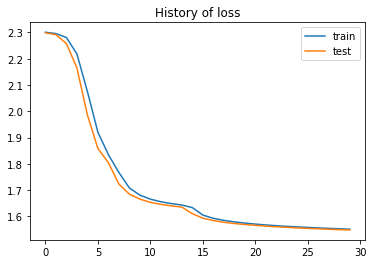

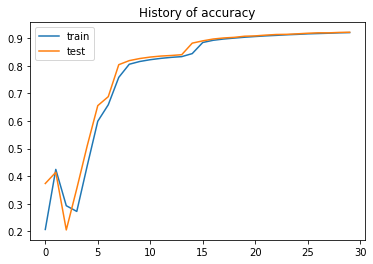

In [12]:
def plot_history(history):
    plt.plot(history['loss_train'], label='train')
    plt.plot(history['loss_test'], label='test')
    plt.legend()
    plt.title("History of loss")
    plt.show()

    plt.plot(history['acc_train'], label='train')
    plt.plot(history['acc_test'], label='test')
    plt.legend()
    plt.title("History of accuracy")
    plt.show()

plot_history(history)

12. Save model and optimizer states to files.

Use method `state_dict` and function `torch.save`.

In [13]:
sd = {'model': net.state_dict(), 'opt': optimizer.state_dict()}
torch.save(sd, 'MINST_MLP.pth')

13. Create new network with the same architecture and initialize it with saved weights.

`torch.load`, `load_state_dict`.

In [14]:
sd2 = torch.load('MINST_MLP.pth', map_location=device)
net2 = MLP((1,28,28), 10)
optimizer2 = torch.optim.SGD(net2.parameters(), lr=0.01)

net2.load_state_dict(sd2['model'])
optimizer2.load_state_dict(sd2['opt'])

In [15]:
# Compare evaluations
net1, loss1, acc1 = train_test_pass(net, 
                                    test_loader,
                                    loss_fcn,
                                    metric,
                                    optimizer,
                                    update_period=1,
                                    mode='test',
                                    device=device)
print(f'Net1: loss={loss1:.4f} acc={acc1:.4f}')

net2, loss2, acc2 = train_test_pass(net2, 
                                    test_loader,
                                    loss_fcn,
                                    metric,
                                    optimizer2,
                                    update_period=1,
                                    mode='test',
                                    device=device)
print(f'Net2: loss={loss2:.4f} acc={acc2:.4f}')

157it [00:01, 127.08it/s]


Net1: loss=1.5482 acc=0.9211


157it [00:01, 129.56it/s]

Net2: loss=1.5482 acc=0.9211


14. Define your own model and train it.

Try achieve better results.

You can use different parameters, layers e.g.:
- conv2d
- maxpooling2d
- batch norm 2d
- and more...

Save weights to file.

In [22]:
from torch import nn


class CustomNetwork(nn.Module):
    def __init__(self, input_shape, num_of_cls) -> None:
        super().__init__()
        ch_in = input_shape[0]
        self.CNN = nn.Sequential(
            # input shape = [1,28,28]
            nn.Conv2d(ch_in,32,3,padding=(1,1)), # shape [32,28,28]
            nn.BatchNorm2d(32), # shape [32,28,28]
            nn.ReLU(), # shape [32,28,28]
            nn.MaxPool2d(2,2), # shape [32,14,14]
            
            nn.Conv2d(32,64,3,padding=(1,1)), # shape [64,14,14]
            nn.BatchNorm2d(64), # shape [64,14,14]
            nn.ReLU(), # shape [64,14,14]
            nn.MaxPool2d(2,2), # shape [64,7,7]
            
            nn.Conv2d(64,128,3), # shape [128,5,5]
            nn.BatchNorm2d(128), # shape [128,5,5]
            nn.ReLU(), # shape [128,5,5]
        )
        
        CNN_out_size = 128*(input_shape[1] // 2 // 2 - 2)*(input_shape[2] // 2 // 2 - 2)
        # CNN_out_size = 128*5*5
        # or less efficient
        # with torch.no_grad():
        #     t = torch.empty((1,)+input_shape, dtype=torch.float32)
        #     t = self.CNN(t)
        #     CNN_out_size = torch.prod(torch.tensor(t.shape))
        
        self.classification_head = nn.Sequential(
            nn.Flatten(),
            nn.Linear(CNN_out_size, num_of_cls),
            nn.Softmax(dim=1)
        )
    
    def forward(self, x):
        x = self.CNN(x)
        y = self.classification_head(x)
        return y


new_model = CustomNetwork((1,28,28), 10)
new_params = new_model.parameters()
new_optimizer = torch.optim.SGD(new_params, lr=0.01)

print("Number of parameters:", count_params(new_model))

Number of parameters: 125130


In [23]:
new_model, new_history = training(new_model,
                              train_loader,
                              loss_fcn,
                              metric,
                              new_optimizer,
                              update_period=5,
                              epoch_max=5,
                              device=device)

Epoch 1 / 5: STARTED
TRAINING

938it [00:30, 30.59it/s]


VALIDATION

157it [00:05, 31.17it/s]


After epoch 1: loss=1.6553 acc=0.8621 val_loss=1.5210 val_acc=0.9641
Epoch 1 / 5: FINISHED

Epoch 2 / 5: STARTED
TRAINING

938it [00:29, 31.45it/s]


VALIDATION

157it [00:04, 31.85it/s]


After epoch 2: loss=1.5131 acc=0.9680 val_loss=1.5008 val_acc=0.9750
Epoch 2 / 5: FINISHED

Epoch 3 / 5: STARTED
TRAINING

938it [00:30, 31.26it/s]


VALIDATION

157it [00:04, 32.86it/s]


After epoch 3: loss=1.4987 acc=0.9761 val_loss=1.4925 val_acc=0.9796
Epoch 3 / 5: FINISHED

Epoch 4 / 5: STARTED
TRAINING

938it [00:29, 31.69it/s]


VALIDATION

157it [00:04, 31.68it/s]


After epoch 4: loss=1.4920 acc=0.9799 val_loss=1.4878 val_acc=0.9824
Epoch 4 / 5: FINISHED

Epoch 5 / 5: STARTED
TRAINING

938it [00:26, 35.04it/s]


VALIDATION

157it [00:05, 31.33it/s]

After epoch 5: loss=1.4877 acc=0.9826 val_loss=1.4852 val_acc=0.9839
Epoch 5 / 5: FINISHED



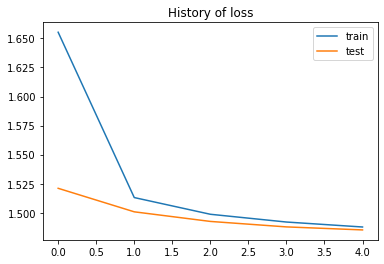

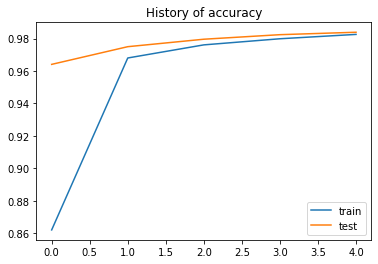

In [24]:
plot_history(new_history)

In [25]:
sd = {'model': new_model.state_dict(), 
      'opt': new_optimizer.state_dict()}
torch.save(sd, 'MINST_CNN.pth')

15. You can leave a feedback, if you want :)

16. Additional exercises please upload to UPEL / moodle.